In [2]:
import pandas as pd

splits = {'train': 'data/train-00000-of-00001.parquet', 'validation': 'data/validation-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
df = pd.read_parquet("hf://datasets/GonzaloA/fake_news/" + splits["train"])

/opt/anaconda3/envs/cse158/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = df.drop(columns=["Unnamed: 0"])


In [4]:
df.head(10)

,title,text,label
0,‘Maury’ Show Official Facebook Posts F*CKED U...,Maury is perhaps one of the trashiest shows on...,0
1,Trump’s Favorite News Channel Tries To Soothe...,"Yesterday, after the father of one of the UCLA...",0
2,"Russia warns Iraq, Kurds not to destabilize Mi...",MOSCOW (Reuters) - Russia on Wednesday warned ...,1
3,WATCH STEVE SCALISE Throw A Strike At The Nati...,"House Majority Whip Steve Scalise (R., La.) th...",0
4,Trump Will HATE What Stephen Colbert Just Did...,It can be said that Late Show host Stephen Col...,0
5,Trump Blasts Democrats: A ‘disgrace’ that Full...,21st Century Wire says In a tweet by President...,0
6,EU's Verhofstadt pokes fun at British PM May b...,LONDON (Reuters) - The lead Brexit negotiator ...,1
7,Photographer killed in Mexico as journalist de...,MEXICO CITY (Reuters) - The bullet-riddled bod...,1
8,NY Daily News Runs Most Explosive Trump Cover...,The New York Daily News has never been subtle ...,0
9,BRILLIANT! CNN ASKS BLACK TRUMP SUPPORTER The ...,This is hysterical! CNN asks a Trump supporter...,0


In [5]:
import matplotlib.pyplot as plt

df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

df

,title,text,label,word_count
0,‘Maury’ Show Official Facebook Posts F*CKED U...,Maury is perhaps one of the trashiest shows on...,0,430
1,Trump’s Favorite News Channel Tries To Soothe...,"Yesterday, after the father of one of the UCLA...",0,715
2,"Russia warns Iraq, Kurds not to destabilize Mi...",MOSCOW (Reuters) - Russia on Wednesday warned ...,1,70
3,WATCH STEVE SCALISE Throw A Strike At The Nati...,"House Majority Whip Steve Scalise (R., La.) th...",0,210
4,Trump Will HATE What Stephen Colbert Just Did...,It can be said that Late Show host Stephen Col...,0,204
...,...,...,...,...
24348,EU Parliament chief asks Poland to ensure MEPs...,WARSAW (Reuters) - The president of the Europe...,1,403
24349,Chemical weapons watchdog found sarin used in ...,AMSTERDAM/UNITED NATIONS (Reuters) - An inquir...,1,480
24350,"Melissa Harris-Perry Is DONE With MSNBC, Pens...","As you may or may not know at this point, MSNB...",0,990
24351,Trump's pick for Navy secretary withdraws,WASHINGTON (Reuters) - U.S. President Donald T...,1,192


In [6]:
df_sorted = df.sort_values(by='word_count', ascending=False)

top_10 = df_sorted.head(10)

top_10

,title,text,label,word_count
5530,"CULT CRIMES, MASS SHOOTINGS & MEDIA MIND CONTR...",Shawn Helton 21st Century WireThe 1994 cult fi...,0,7209
480,ANTI-AMERICAN GEORGE SOROS Locks Arms With NFL...,We just discovered another reason NOT to suppo...,0,7033
6741,WOW! AMERICA IS UNDER ATTACK By These 187 Orga...,There have been many articles written about Ge...,0,6608
6368,What is The Deep State?,One of the ancillary benefits of Donald Trump ...,0,6253
22668,how the camp of the saints predicted the migra...,why is obama threatening russia with world war...,1,5828
20119,Washington Post Sloppy ‘Journalism’ Blames Rus...,Patrick Henningsen 21st Century Wire The mains...,0,5739
7735,Trump vs Clinton 2016: Mickey Mouse vs Cruella...,Patrick Henningsen 21st Century WireToday Ame...,0,5580
6147,jy crois encore par alain juppé en train def...,zika a masterpiece of public mind control \nsa...,0,5219
23943,dr duke and pastor dankof quote jews boasting ...,views share by dr david duke when i was first...,1,5215
1519,"ORLANDO ‘KNOWN WOLF’ Watched by FBI, Worked wi...",Shawn Helton 21st Century WireOrlando s Puls...,0,5064


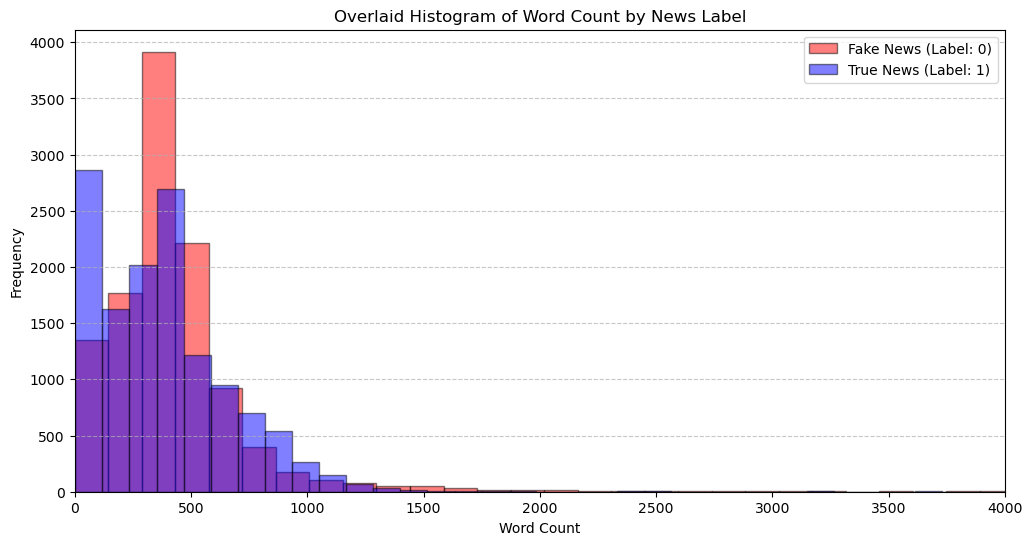

In [7]:
# Separate data by label
fake_news = df[df['label'] == 0]
true_news = df[df['label'] == 1]

# Plot histograms for word count, overlaid
plt.figure(figsize=(12, 6))
plt.hist(fake_news['word_count'], bins=50, alpha=0.5, label='Fake News (Label: 0)', color='red', edgecolor='black')
plt.hist(true_news['word_count'], bins=50, alpha=0.5, label='True News (Label: 1)', color='blue', edgecolor='black')

# Set x-axis limit
plt.xlim(0, 4000)

# Add labels, legend, and title
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Overlaid Histogram of Word Count by News Label')
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [19]:
[x for x in df['title'] if '*' in x]

[' ‘Maury’ Show Official Facebook Posts F*CKED UP Caption On Guest That Looks Like Ted Cruz (IMAGE)',
 ' Ohio Fireman In Deep Sh*t For HORRIBLE Remarks About Saving ‘N*****s’',
 ' The Resistance Just Gave Trump A Huge F**CK YOU On Election Night',
 ' President Vicente ‘I’m Not Building That F*cking Wall’ Fox Says Trump Is Like Hitler (VIDEO)',
 ' Angela Merkel’s Husband Is Taking Melania And Ivanka On A Tour That Will P*ss Trump Off',
 'WHOA! BREAKING NEWS: CNN Producer Caught On Undercover Tape Admitting Trump-Russia Coverage Is BULLSH*T…”President Is Right To Say You Are ‘Witch Hunting’ Me” (VIDEO)',
 ' Bernie Sanders Just Told Republicans And Billionaires To F*** Off In The BEST Possible Way (VIDEO)',
 ' Trump Just Dedicated A F**king GOLF TROPHY To People Who Are Suffering In Puerto Rico',
 ' Restaurant Owner Calls Black Customer ‘N*****’ Then Throws Him Out Because ‘Trump Is President Now’',
 ' Republicans Turn On Trump, Throw Him Under The Bus For F*cking Up Health Care Plan (DET

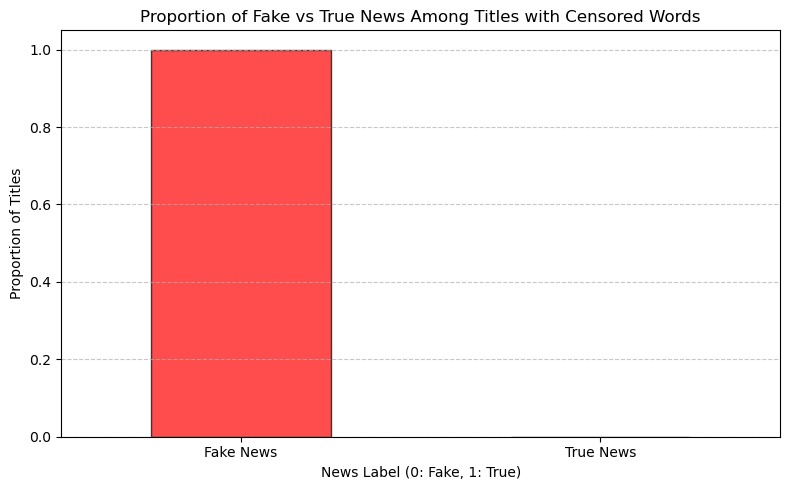

343


In [33]:
# Add a column to flag censored words in the title
df['contains_censored'] = df['title'].str.contains(r'\*', na=False)

# Filter only titles with censored words
censored_df = df[df['contains_censored']]

# Calculate proportions of fake vs true news among titles with censored words
censored_proportions = censored_df['label'].value_counts(normalize=True)

# Ensure both labels (0 and 1) are present in the output
censored_proportion = censored_proportions.reindex([0, 1], fill_value=0)

# Plot the results
plt.figure(figsize=(8, 5))
censored_proportion.plot(kind='bar', color=['red', 'blue'], edgecolor='black', alpha=0.7)

# Add labels and title
plt.title('Proportion of Fake vs True News Among Titles with Censored Words')
plt.ylabel('Proportion of Titles')
plt.xlabel('News Label (0: Fake, 1: True)')
plt.xticks(ticks=[0, 1], labels=['Fake News', 'True News'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
print(len(censored_df))


In [34]:
len(censored_df)

343